<a href="https://colab.research.google.com/github/bala1802/ERA/blob/main/Session-7/Session_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
cd /content/drive/MyDrive/ERA-Session-7

/content/drive/MyDrive/ERA-Session-7


# Import Libraries

In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

# Import Helper packages

In [4]:
import util as util
import model as model

CUDA Available? True


# Data Utils

In [5]:
train = util.loadTrainData()
test = util.loadTestData()

Loading Train Data.....
Loading Testing Data.....


In [6]:
train_loader = util.loadTrainLoader(train)
test_loader = util.loadTestLoader(test)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [7]:
len(train_loader), len(test_loader)

(469, 79)

# Data Explanation

In [ ]:
util.explainTrainData(train, train_loader)

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


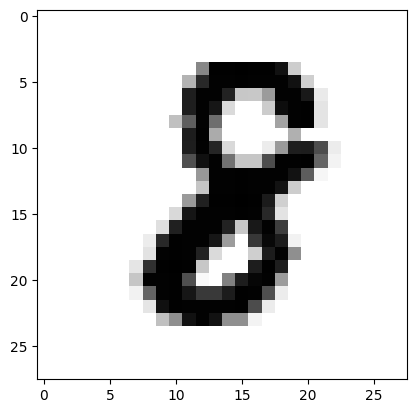

In [ ]:
util.displayImageByIndex(train_loader=train_loader, index=0)

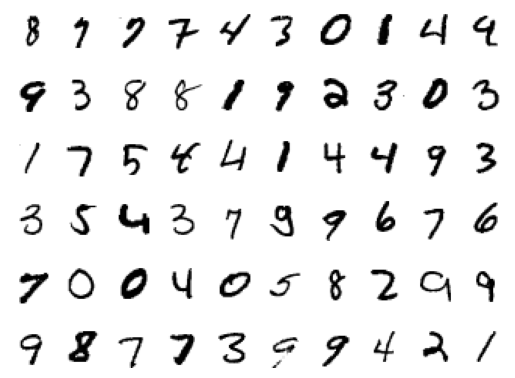

In [ ]:
util.displayRandomImages(train_loader=train_loader)

# Cuda selection

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


# Model-1

**Observation**:

- This model is built for setting up the architecture.
- ~6.3M parameters.
- Unable to achieve the test accuracy to ~ `99.4%`.
- The best training accuracy is `99.96%` and the best test accuracy is `99.25%`

This model is overfitting, as you can see improving the training accuracy from `99.96`% is not going to help converting the test accuracy `99.4`%

In [ ]:
model_1 = model.Model_1().to(device)
summary(model_1, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
-------------------------------------

#### Model-1 Training & Testing

In [ ]:
optimizer = util.load_optimizer(model=model_1)
train_acc, train_losses, test_acc, test_losses = util.run_epochs(model=model_1, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


Loss=0.12350425124168396 Batch_id=468 Accuracy=85.95: 100%|██████████| 469/469 [00:22<00:00, 20.59it/s]



Test set: Average loss: 0.0721, Accuracy: 9778/10000 (97.78%)

EPOCH: 1


Loss=0.022801710292696953 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:21<00:00, 22.17it/s]



Test set: Average loss: 0.0371, Accuracy: 9883/10000 (98.83%)

EPOCH: 2


Loss=0.05937637761235237 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:21<00:00, 22.07it/s]



Test set: Average loss: 0.0297, Accuracy: 9898/10000 (98.98%)

EPOCH: 3


Loss=0.011776667088270187 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:20<00:00, 23.41it/s]



Test set: Average loss: 0.0270, Accuracy: 9909/10000 (99.09%)

EPOCH: 4


Loss=0.025593755766749382 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:20<00:00, 22.98it/s]



Test set: Average loss: 0.0289, Accuracy: 9905/10000 (99.05%)

EPOCH: 5


Loss=0.021655380725860596 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:20<00:00, 23.44it/s]



Test set: Average loss: 0.0218, Accuracy: 9932/10000 (99.32%)

EPOCH: 6


Loss=0.007887798361480236 Batch_id=468 Accuracy=99.55: 100%|██████████| 469/469 [00:20<00:00, 22.42it/s]



Test set: Average loss: 0.0281, Accuracy: 9907/10000 (99.07%)

EPOCH: 7


Loss=0.0007910752319730818 Batch_id=468 Accuracy=99.61: 100%|██████████| 469/469 [00:19<00:00, 23.76it/s]



Test set: Average loss: 0.0225, Accuracy: 9923/10000 (99.23%)

EPOCH: 8


Loss=0.0010453975992277265 Batch_id=468 Accuracy=99.78: 100%|██████████| 469/469 [00:23<00:00, 20.22it/s]



Test set: Average loss: 0.0229, Accuracy: 9927/10000 (99.27%)

EPOCH: 9


Loss=0.004697924945503473 Batch_id=468 Accuracy=99.79: 100%|██████████| 469/469 [00:20<00:00, 23.27it/s]



Test set: Average loss: 0.0284, Accuracy: 9926/10000 (99.26%)

EPOCH: 10


Loss=0.013689079321920872 Batch_id=468 Accuracy=99.82: 100%|██████████| 469/469 [00:20<00:00, 23.15it/s]



Test set: Average loss: 0.0257, Accuracy: 9930/10000 (99.30%)

EPOCH: 11


Loss=0.00046828461927361786 Batch_id=468 Accuracy=99.84: 100%|██████████| 469/469 [00:21<00:00, 22.27it/s]



Test set: Average loss: 0.0288, Accuracy: 9936/10000 (99.36%)

EPOCH: 12


Loss=0.00581255741417408 Batch_id=468 Accuracy=99.86: 100%|██████████| 469/469 [00:20<00:00, 22.99it/s]



Test set: Average loss: 0.0275, Accuracy: 9923/10000 (99.23%)

EPOCH: 13


Loss=0.0002510461781639606 Batch_id=468 Accuracy=99.86: 100%|██████████| 469/469 [00:20<00:00, 22.66it/s]



Test set: Average loss: 0.0272, Accuracy: 9925/10000 (99.25%)

EPOCH: 14


Loss=0.0010561036178842187 Batch_id=468 Accuracy=99.95: 100%|██████████| 469/469 [00:20<00:00, 23.37it/s]



Test set: Average loss: 0.0269, Accuracy: 9923/10000 (99.23%)



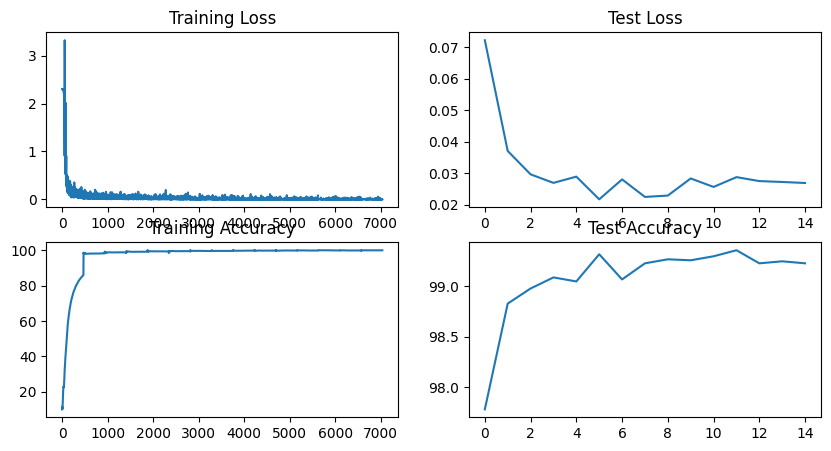

In [ ]:
util.plot_results(train_acc=train_acc, train_losses=train_losses, test_acc=test_acc, test_losses=test_losses)

# Model-2

Let's build a model by reducing the number of channels at the end layers

- The model parameter is reduced to ~ 700K
- The channels in the end layers of the model is reduced.
- The training accuracy at Epoch-14 is `99.87` and the test accuracy is `99.13%`. The model is definitely overfitting

In [ ]:
model_2 = model.Model_2().to(device)
summary(model_2, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 128, 5, 5]         295,040
            Conv2d-8             [-1, 64, 3, 3]          73,792
            Conv2d-9             [-1, 10, 1, 1]           5,770
Total params: 762,442
Trainable params: 762,442
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.37
Params size (MB): 2.91
Estimated Total Size (MB): 4.28
-------------------------------------------

#### Model-2 Training and Testing

In [ ]:
optimizer = util.load_optimizer(model=model_2)
train_acc, train_losses, test_acc, test_losses = util.run_epochs(model=model_2, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


Loss=0.08575616031885147 Batch_id=468 Accuracy=84.17: 100%|██████████| 469/469 [00:18<00:00, 25.83it/s]



Test set: Average loss: 0.1013, Accuracy: 9676/10000 (96.76%)

EPOCH: 1


Loss=0.007700027897953987 Batch_id=468 Accuracy=97.93: 100%|██████████| 469/469 [00:19<00:00, 24.42it/s]



Test set: Average loss: 0.0443, Accuracy: 9858/10000 (98.58%)

EPOCH: 2


Loss=0.01784413866698742 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:18<00:00, 25.07it/s]



Test set: Average loss: 0.0302, Accuracy: 9905/10000 (99.05%)

EPOCH: 3


Loss=0.04844943806529045 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:19<00:00, 24.32it/s]



Test set: Average loss: 0.0336, Accuracy: 9900/10000 (99.00%)

EPOCH: 4


Loss=0.022671258077025414 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:18<00:00, 25.17it/s]



Test set: Average loss: 0.0297, Accuracy: 9908/10000 (99.08%)

EPOCH: 5


Loss=0.015291641466319561 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:20<00:00, 23.23it/s]



Test set: Average loss: 0.0296, Accuracy: 9899/10000 (98.99%)

EPOCH: 6


Loss=0.0018629891565069556 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:18<00:00, 25.89it/s]



Test set: Average loss: 0.0287, Accuracy: 9906/10000 (99.06%)

EPOCH: 7


Loss=0.01770947314798832 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:18<00:00, 25.54it/s]



Test set: Average loss: 0.0278, Accuracy: 9903/10000 (99.03%)

EPOCH: 8


Loss=0.01262450311332941 Batch_id=468 Accuracy=99.59: 100%|██████████| 469/469 [00:19<00:00, 23.72it/s]



Test set: Average loss: 0.0252, Accuracy: 9917/10000 (99.17%)

EPOCH: 9


Loss=0.0026447635609656572 Batch_id=468 Accuracy=99.70: 100%|██████████| 469/469 [00:18<00:00, 25.14it/s]



Test set: Average loss: 0.0271, Accuracy: 9926/10000 (99.26%)

EPOCH: 10


Loss=0.005890930537134409 Batch_id=468 Accuracy=99.69: 100%|██████████| 469/469 [00:17<00:00, 26.29it/s]



Test set: Average loss: 0.0322, Accuracy: 9903/10000 (99.03%)

EPOCH: 11


Loss=0.003177926642820239 Batch_id=468 Accuracy=99.75: 100%|██████████| 469/469 [00:17<00:00, 26.30it/s]



Test set: Average loss: 0.0292, Accuracy: 9910/10000 (99.10%)

EPOCH: 12


Loss=0.006882937625050545 Batch_id=468 Accuracy=99.78: 100%|██████████| 469/469 [00:18<00:00, 25.28it/s]



Test set: Average loss: 0.0313, Accuracy: 9915/10000 (99.15%)

EPOCH: 13


Loss=0.00040819196146912873 Batch_id=468 Accuracy=99.80: 100%|██████████| 469/469 [00:17<00:00, 26.16it/s]



Test set: Average loss: 0.0290, Accuracy: 9916/10000 (99.16%)

EPOCH: 14


Loss=0.0006784723955206573 Batch_id=468 Accuracy=99.87: 100%|██████████| 469/469 [00:19<00:00, 24.40it/s]



Test set: Average loss: 0.0326, Accuracy: 9913/10000 (99.13%)



# Model-3

- The number of parameters are reduced to ~48K Parameters
- In the end layers, the channels are reduced from 64->32->16
- Then the channels are converted to the number of labels 10
- Still the model is overfitting


In [ ]:
model_3 = model.Model_3().to(device)
summary(model_3, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 28, 28]              40
            Conv2d-2           [-1, 16, 28, 28]             592
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           4,640
            Conv2d-5           [-1, 64, 14, 14]          18,496
         MaxPool2d-6             [-1, 64, 7, 7]               0
            Conv2d-7             [-1, 32, 5, 5]          18,464
            Conv2d-8             [-1, 16, 3, 3]           4,624
            Conv2d-9             [-1, 10, 1, 1]           1,450
Total params: 48,306
Trainable params: 48,306
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.32
Params size (MB): 0.18
Estimated Total Size (MB): 0.51
---------------------------------------------

In [ ]:
optimizer = util.load_optimizer(model=model_3)
train_acc, train_losses, test_acc, test_losses = util.run_epochs(model=model_3, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=0.05587835982441902 Batch_id=468 Accuracy=69.24: 100%|██████████| 469/469 [00:17<00:00, 27.50it/s]



Test set: Average loss: 0.0916, Accuracy: 9690/10000 (96.90%)

EPOCH: 1


Loss=0.025663306936621666 Batch_id=468 Accuracy=97.22: 100%|██████████| 469/469 [00:18<00:00, 25.51it/s]



Test set: Average loss: 0.0569, Accuracy: 9812/10000 (98.12%)

EPOCH: 2


Loss=0.07044528424739838 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:17<00:00, 27.23it/s]



Test set: Average loss: 0.0453, Accuracy: 9860/10000 (98.60%)

EPOCH: 3


Loss=0.04302242025732994 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:21<00:00, 22.10it/s]



Test set: Average loss: 0.0400, Accuracy: 9868/10000 (98.68%)

EPOCH: 4


Loss=0.06164010241627693 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:18<00:00, 25.19it/s]



Test set: Average loss: 0.0348, Accuracy: 9895/10000 (98.95%)

EPOCH: 5


Loss=0.033525221049785614 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:19<00:00, 24.25it/s]



Test set: Average loss: 0.0349, Accuracy: 9888/10000 (98.88%)

EPOCH: 6


Loss=0.0397924967110157 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:20<00:00, 23.31it/s]



Test set: Average loss: 0.0359, Accuracy: 9880/10000 (98.80%)

EPOCH: 7


Loss=0.006269786506891251 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:18<00:00, 25.87it/s]



Test set: Average loss: 0.0282, Accuracy: 9907/10000 (99.07%)

EPOCH: 8


Loss=0.016820987686514854 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:18<00:00, 26.02it/s]



Test set: Average loss: 0.0295, Accuracy: 9906/10000 (99.06%)

EPOCH: 9


Loss=0.024918029084801674 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:18<00:00, 25.80it/s]



Test set: Average loss: 0.0366, Accuracy: 9887/10000 (98.87%)

EPOCH: 10


Loss=0.02718585915863514 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:18<00:00, 25.93it/s]



Test set: Average loss: 0.0356, Accuracy: 9893/10000 (98.93%)

EPOCH: 11


Loss=0.016237039119005203 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:18<00:00, 24.99it/s]



Test set: Average loss: 0.0326, Accuracy: 9904/10000 (99.04%)

EPOCH: 12


Loss=0.0023905292619019747 Batch_id=468 Accuracy=99.54: 100%|██████████| 469/469 [00:17<00:00, 26.35it/s]



Test set: Average loss: 0.0321, Accuracy: 9905/10000 (99.05%)

EPOCH: 13


Loss=0.00175669405143708 Batch_id=468 Accuracy=99.59: 100%|██████████| 469/469 [00:17<00:00, 27.00it/s]



Test set: Average loss: 0.0365, Accuracy: 9905/10000 (99.05%)

EPOCH: 14


Loss=0.0006253690808080137 Batch_id=468 Accuracy=99.65: 100%|██████████| 469/469 [00:18<00:00, 25.89it/s]



Test set: Average loss: 0.0316, Accuracy: 9913/10000 (99.13%)



# Model-4

- The number of parameters used are same as the Model-3
- The paddings are removed from the initial layers and added in the middle convolutional layers
- In total 3 max pooling layers are added
- the 3rd maxpooling layer is added just before the prediction layer

In [ ]:
model_4 = model.Model_4().to(device)
summary(model_4, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
            Conv2d-2           [-1, 16, 24, 24]             592
         MaxPool2d-3           [-1, 16, 12, 12]               0
            Conv2d-4           [-1, 32, 12, 12]           4,640
            Conv2d-5           [-1, 64, 12, 12]          18,496
         MaxPool2d-6             [-1, 64, 6, 6]               0
            Conv2d-7             [-1, 32, 6, 6]          18,464
            Conv2d-8             [-1, 16, 6, 6]           4,624
         MaxPool2d-9             [-1, 16, 3, 3]               0
           Conv2d-10             [-1, 10, 1, 1]           1,450
Total params: 48,306
Trainable params: 48,306
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.25
Params size (MB): 0.18
Estimated Tot

In [ ]:
optimizer = util.load_optimizer(model=model_4)
train_acc, train_losses, test_acc, test_losses = util.run_epochs(model=model_4, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


Loss=0.14569266140460968 Batch_id=468 Accuracy=50.89: 100%|██████████| 469/469 [00:19<00:00, 23.93it/s]



Test set: Average loss: 0.1829, Accuracy: 9405/10000 (94.05%)

EPOCH: 1


Loss=0.05170297995209694 Batch_id=468 Accuracy=95.47: 100%|██████████| 469/469 [00:18<00:00, 25.85it/s]



Test set: Average loss: 0.0741, Accuracy: 9759/10000 (97.59%)

EPOCH: 2


Loss=0.12571144104003906 Batch_id=468 Accuracy=97.69: 100%|██████████| 469/469 [00:19<00:00, 24.38it/s]



Test set: Average loss: 0.0587, Accuracy: 9810/10000 (98.10%)

EPOCH: 3


Loss=0.06411970406770706 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:18<00:00, 25.78it/s]



Test set: Average loss: 0.0395, Accuracy: 9869/10000 (98.69%)

EPOCH: 4


Loss=0.04702216014266014 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [00:18<00:00, 25.96it/s]



Test set: Average loss: 0.0340, Accuracy: 9884/10000 (98.84%)

EPOCH: 5


Loss=0.0880768895149231 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:19<00:00, 24.47it/s]



Test set: Average loss: 0.0466, Accuracy: 9851/10000 (98.51%)

EPOCH: 6


Loss=0.018619300797581673 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:17<00:00, 26.62it/s]



Test set: Average loss: 0.0290, Accuracy: 9903/10000 (99.03%)

EPOCH: 7


Loss=0.0023125053849071264 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:19<00:00, 24.02it/s]



Test set: Average loss: 0.0296, Accuracy: 9899/10000 (98.99%)

EPOCH: 8


Loss=0.04517937824130058 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:17<00:00, 26.21it/s]



Test set: Average loss: 0.0249, Accuracy: 9910/10000 (99.10%)

EPOCH: 9


Loss=0.006765024736523628 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:17<00:00, 26.81it/s]



Test set: Average loss: 0.0260, Accuracy: 9917/10000 (99.17%)

EPOCH: 10


Loss=0.02761671505868435 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:17<00:00, 26.77it/s]



Test set: Average loss: 0.0247, Accuracy: 9915/10000 (99.15%)

EPOCH: 11


Loss=0.039998944848775864 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:17<00:00, 26.67it/s]



Test set: Average loss: 0.0237, Accuracy: 9911/10000 (99.11%)

EPOCH: 12


Loss=0.002021301770582795 Batch_id=468 Accuracy=99.52: 100%|██████████| 469/469 [00:17<00:00, 26.74it/s]



Test set: Average loss: 0.0248, Accuracy: 9913/10000 (99.13%)

EPOCH: 13


Loss=0.0007692749495618045 Batch_id=468 Accuracy=99.58: 100%|██████████| 469/469 [00:17<00:00, 27.26it/s]



Test set: Average loss: 0.0294, Accuracy: 9905/10000 (99.05%)

EPOCH: 14


Loss=0.0029554448556154966 Batch_id=468 Accuracy=99.64: 100%|██████████| 469/469 [00:17<00:00, 26.94it/s]



Test set: Average loss: 0.0310, Accuracy: 9908/10000 (99.08%)



# Model-5

- The total number of parameters are reduced to ~10.7K
- The final layer is convolved using 7X7 instead 3X3 and the receptive field is achieved
- The model is not overfitting, training further can improve the test accuracy.
- The Best Training accuracy is `98.6` and the best Test accuracy is `98.23`

In [ ]:
model_5 = model.Model_5().to(device)
summary(model_5, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
            Conv2d-3           [-1, 10, 24, 24]             900
              ReLU-4           [-1, 10, 24, 24]               0
            Conv2d-5           [-1, 20, 22, 22]           1,800
              ReLU-6           [-1, 20, 22, 22]               0
         MaxPool2d-7           [-1, 20, 11, 11]               0
            Conv2d-8           [-1, 10, 11, 11]             200
              ReLU-9           [-1, 10, 11, 11]               0
           Conv2d-10             [-1, 10, 9, 9]             900
             ReLU-11             [-1, 10, 9, 9]               0
           Conv2d-12             [-1, 20, 7, 7]           1,800
             ReLU-13             [-1, 20, 7, 7]               0
           Conv2d-14             [-1, 1

In [ ]:
optimizer = util.load_optimizer(model=model_5)
train_acc, train_losses, test_acc, test_losses = util.run_epochs(model=model_5, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


Loss=1.0228667259216309 Batch_id=468 Accuracy=21.60: 100%|██████████| 469/469 [00:16<00:00, 29.12it/s]



Test set: Average loss: 0.8061, Accuracy: 7493/10000 (74.93%)

EPOCH: 1


Loss=0.40366223454475403 Batch_id=468 Accuracy=89.05: 100%|██████████| 469/469 [00:16<00:00, 28.59it/s]



Test set: Average loss: 0.2026, Accuracy: 9370/10000 (93.70%)

EPOCH: 2


Loss=0.06261425465345383 Batch_id=468 Accuracy=94.63: 100%|██████████| 469/469 [00:17<00:00, 27.14it/s]



Test set: Average loss: 0.1152, Accuracy: 9638/10000 (96.38%)

EPOCH: 3


Loss=0.09397915750741959 Batch_id=468 Accuracy=96.42: 100%|██████████| 469/469 [00:16<00:00, 28.61it/s]



Test set: Average loss: 0.0961, Accuracy: 9699/10000 (96.99%)

EPOCH: 4


Loss=0.09554091840982437 Batch_id=468 Accuracy=97.25: 100%|██████████| 469/469 [00:17<00:00, 26.22it/s]



Test set: Average loss: 0.0808, Accuracy: 9733/10000 (97.33%)

EPOCH: 5


Loss=0.06839443743228912 Batch_id=468 Accuracy=97.64: 100%|██████████| 469/469 [00:16<00:00, 28.81it/s]



Test set: Average loss: 0.0767, Accuracy: 9750/10000 (97.50%)

EPOCH: 6


Loss=0.04713132977485657 Batch_id=468 Accuracy=97.86: 100%|██████████| 469/469 [00:16<00:00, 28.53it/s]



Test set: Average loss: 0.0620, Accuracy: 9800/10000 (98.00%)

EPOCH: 7


Loss=0.08345159143209457 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:17<00:00, 27.02it/s]



Test set: Average loss: 0.0617, Accuracy: 9806/10000 (98.06%)

EPOCH: 8


Loss=0.06690151244401932 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:16<00:00, 28.51it/s]



Test set: Average loss: 0.0572, Accuracy: 9813/10000 (98.13%)

EPOCH: 9


Loss=0.01469310000538826 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [00:16<00:00, 28.20it/s]



Test set: Average loss: 0.0551, Accuracy: 9817/10000 (98.17%)

EPOCH: 10


Loss=0.07874524593353271 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:16<00:00, 27.97it/s]



Test set: Average loss: 0.0606, Accuracy: 9783/10000 (97.83%)

EPOCH: 11


Loss=0.04648565128445625 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:16<00:00, 28.26it/s]



Test set: Average loss: 0.0514, Accuracy: 9833/10000 (98.33%)

EPOCH: 12


Loss=0.025395475327968597 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:17<00:00, 26.72it/s]



Test set: Average loss: 0.0539, Accuracy: 9819/10000 (98.19%)

EPOCH: 13


Loss=0.05444033443927765 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:16<00:00, 28.43it/s]



Test set: Average loss: 0.0517, Accuracy: 9821/10000 (98.21%)

EPOCH: 14


Loss=0.036038100719451904 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:16<00:00, 28.63it/s]



Test set: Average loss: 0.0520, Accuracy: 9823/10000 (98.23%)



# Model-6

- Added `BatchNormalization` to all the convolutional layers except the last layer.
- The model is overfitting.
- The best training accuracy is `99.72` and test accuracy is `98.99%`

In [ ]:
model_6 = model.Model_6().to(device)
summary(model_6, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 20, 22, 22]           1,800
       BatchNorm2d-8           [-1, 20, 22, 22]              40
              ReLU-9           [-1, 20, 22, 22]               0
        MaxPool2d-10           [-1, 20, 11, 11]               0
           Conv2d-11           [-1, 10, 11, 11]             200
      BatchNorm2d-12           [-1, 10, 11, 11]              20
             ReLU-13           [-1, 10, 11, 11]               0
           Conv2d-14             [-1, 1

In [ ]:
optimizer = util.load_optimizer(model=model_6)
train_acc, train_losses, test_acc, test_losses = util.run_epochs(model=model_6, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


Loss=0.06188829615712166 Batch_id=468 Accuracy=94.22: 100%|██████████| 469/469 [00:18<00:00, 25.17it/s]



Test set: Average loss: 0.0613, Accuracy: 9805/10000 (98.05%)

EPOCH: 1


Loss=0.14059986174106598 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:17<00:00, 26.21it/s]



Test set: Average loss: 0.0557, Accuracy: 9819/10000 (98.19%)

EPOCH: 2


Loss=0.02704717218875885 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:18<00:00, 25.19it/s]



Test set: Average loss: 0.0412, Accuracy: 9868/10000 (98.68%)

EPOCH: 3


Loss=0.019499802961945534 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:17<00:00, 26.92it/s]



Test set: Average loss: 0.0357, Accuracy: 9876/10000 (98.76%)

EPOCH: 4


Loss=0.061622586101293564 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:17<00:00, 26.76it/s]



Test set: Average loss: 0.0346, Accuracy: 9889/10000 (98.89%)

EPOCH: 5


Loss=0.024225348606705666 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:18<00:00, 25.15it/s]



Test set: Average loss: 0.0324, Accuracy: 9892/10000 (98.92%)

EPOCH: 6


Loss=0.004165968392044306 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:17<00:00, 26.98it/s]



Test set: Average loss: 0.0332, Accuracy: 9898/10000 (98.98%)

EPOCH: 7


Loss=0.019065702334046364 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:17<00:00, 26.34it/s]



Test set: Average loss: 0.0320, Accuracy: 9893/10000 (98.93%)

EPOCH: 8


Loss=0.006599837448447943 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:17<00:00, 26.35it/s]



Test set: Average loss: 0.0273, Accuracy: 9907/10000 (99.07%)

EPOCH: 9


Loss=0.009999112226068974 Batch_id=468 Accuracy=99.49: 100%|██████████| 469/469 [00:17<00:00, 26.88it/s]



Test set: Average loss: 0.0293, Accuracy: 9914/10000 (99.14%)

EPOCH: 10


Loss=0.05221612751483917 Batch_id=468 Accuracy=99.56: 100%|██████████| 469/469 [00:18<00:00, 24.97it/s]



Test set: Average loss: 0.0309, Accuracy: 9905/10000 (99.05%)

EPOCH: 11


Loss=0.03759700059890747 Batch_id=468 Accuracy=99.56: 100%|██████████| 469/469 [00:17<00:00, 26.12it/s]



Test set: Average loss: 0.0264, Accuracy: 9913/10000 (99.13%)

EPOCH: 12


Loss=0.001760900835506618 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:18<00:00, 25.83it/s]



Test set: Average loss: 0.0270, Accuracy: 9915/10000 (99.15%)

EPOCH: 13


Loss=0.01583690010011196 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:17<00:00, 26.60it/s]



Test set: Average loss: 0.0276, Accuracy: 9899/10000 (98.99%)

EPOCH: 14


Loss=0.0048638032749295235 Batch_id=468 Accuracy=99.72: 100%|██████████| 469/469 [00:18<00:00, 25.99it/s]



Test set: Average loss: 0.0312, Accuracy: 9896/10000 (98.96%)



# Model-7

 - Added Dropouts, regularization technique
 - No change in the number of parameters
 - The best training accuracy is 99.22% and the best test accuracy is 99.15%


In [ ]:
model_7 = model.Model_7().to(device)
summary(model_7, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 20, 22, 22]           1,800
       BatchNorm2d-8           [-1, 20, 22, 22]              40
              ReLU-9           [-1, 20, 22, 22]               0
          Dropout-10           [-1, 20, 22, 22]               0
        MaxPool2d-11           [-1, 20, 11, 11]               0
           Conv2d-12           [-1, 10, 11, 11]             200
      BatchNorm2d-13           [-1, 10, 11, 11]              20
             ReLU-14           [-1, 10,

In [ ]:
optimizer = util.load_optimizer(model=model_7)
train_acc, train_losses, test_acc, test_losses = util.run_epochs(model=model_7, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


Loss=0.04320962727069855 Batch_id=468 Accuracy=92.96: 100%|██████████| 469/469 [00:21<00:00, 22.02it/s]



Test set: Average loss: 0.0672, Accuracy: 9795/10000 (97.95%)

EPOCH: 1


Loss=0.18419934809207916 Batch_id=468 Accuracy=97.84: 100%|██████████| 469/469 [00:17<00:00, 27.12it/s]



Test set: Average loss: 0.0682, Accuracy: 9788/10000 (97.88%)

EPOCH: 2


Loss=0.02869229018688202 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:17<00:00, 27.28it/s]



Test set: Average loss: 0.0500, Accuracy: 9840/10000 (98.40%)

EPOCH: 3


Loss=0.06279273331165314 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:18<00:00, 25.03it/s]



Test set: Average loss: 0.0341, Accuracy: 9882/10000 (98.82%)

EPOCH: 4


Loss=0.12273570895195007 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:17<00:00, 26.86it/s]



Test set: Average loss: 0.0459, Accuracy: 9853/10000 (98.53%)

EPOCH: 5


Loss=0.018246406689286232 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:17<00:00, 26.61it/s]



Test set: Average loss: 0.0373, Accuracy: 9876/10000 (98.76%)

EPOCH: 6


Loss=0.03403734415769577 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:17<00:00, 26.33it/s]



Test set: Average loss: 0.0397, Accuracy: 9886/10000 (98.86%)

EPOCH: 7


Loss=0.03131962940096855 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:17<00:00, 26.50it/s]



Test set: Average loss: 0.0349, Accuracy: 9884/10000 (98.84%)

EPOCH: 8


Loss=0.051871102303266525 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:18<00:00, 25.64it/s]



Test set: Average loss: 0.0343, Accuracy: 9896/10000 (98.96%)

EPOCH: 9


Loss=0.0343223512172699 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:17<00:00, 27.02it/s]



Test set: Average loss: 0.0314, Accuracy: 9899/10000 (98.99%)

EPOCH: 10


Loss=0.05785994604229927 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:17<00:00, 27.09it/s]



Test set: Average loss: 0.0334, Accuracy: 9882/10000 (98.82%)

EPOCH: 11


Loss=0.04301886260509491 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:18<00:00, 25.56it/s]



Test set: Average loss: 0.0278, Accuracy: 9912/10000 (99.12%)

EPOCH: 12


Loss=0.013526122085750103 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:17<00:00, 27.10it/s]



Test set: Average loss: 0.0305, Accuracy: 9897/10000 (98.97%)

EPOCH: 13


Loss=0.02091916650533676 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:17<00:00, 26.54it/s]



Test set: Average loss: 0.0287, Accuracy: 9915/10000 (99.15%)

EPOCH: 14


Loss=0.014665097929537296 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:17<00:00, 27.03it/s]



Test set: Average loss: 0.0275, Accuracy: 9909/10000 (99.09%)



# Model-8

 - After applying the Global Average Pooling layer, the number of parameters are reduced to 6070 parameters
 - The best Training accuracy is 98.44% and 97.81%

In [ ]:
model_8 = model.Model_8().to(device)
summary(model_8, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 20, 22, 22]           1,800
       BatchNorm2d-8           [-1, 20, 22, 22]              40
              ReLU-9           [-1, 20, 22, 22]               0
          Dropout-10           [-1, 20, 22, 22]               0
        MaxPool2d-11           [-1, 20, 11, 11]               0
           Conv2d-12           [-1, 10, 11, 11]             200
      BatchNorm2d-13           [-1, 10, 11, 11]              20
             ReLU-14           [-1, 10,

In [ ]:
optimizer = util.load_optimizer(model=model_8)
train_acc, train_losses, test_acc, test_losses = util.run_epochs(model=model_8, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


Loss=0.3678823709487915 Batch_id=468 Accuracy=78.44: 100%|██████████| 469/469 [00:17<00:00, 26.35it/s]



Test set: Average loss: 0.5206, Accuracy: 8843/10000 (88.43%)

EPOCH: 1


Loss=0.21295510232448578 Batch_id=468 Accuracy=95.41: 100%|██████████| 469/469 [00:18<00:00, 25.55it/s]



Test set: Average loss: 0.3064, Accuracy: 9263/10000 (92.63%)

EPOCH: 2


Loss=0.1627008467912674 Batch_id=468 Accuracy=96.77: 100%|██████████| 469/469 [00:17<00:00, 26.18it/s]



Test set: Average loss: 0.2090, Accuracy: 9492/10000 (94.92%)

EPOCH: 3


Loss=0.07803719490766525 Batch_id=468 Accuracy=97.35: 100%|██████████| 469/469 [00:17<00:00, 26.56it/s]



Test set: Average loss: 0.2196, Accuracy: 9430/10000 (94.30%)

EPOCH: 4


Loss=0.15906263887882233 Batch_id=468 Accuracy=97.68: 100%|██████████| 469/469 [00:19<00:00, 24.60it/s]



Test set: Average loss: 0.1448, Accuracy: 9639/10000 (96.39%)

EPOCH: 5


Loss=0.11163803935050964 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:17<00:00, 26.20it/s]



Test set: Average loss: 0.2041, Accuracy: 9438/10000 (94.38%)

EPOCH: 6


Loss=0.09199777990579605 Batch_id=468 Accuracy=97.93: 100%|██████████| 469/469 [00:17<00:00, 26.20it/s]



Test set: Average loss: 0.1948, Accuracy: 9480/10000 (94.80%)

EPOCH: 7


Loss=0.12771479785442352 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:17<00:00, 26.17it/s]



Test set: Average loss: 0.1237, Accuracy: 9686/10000 (96.86%)

EPOCH: 8


Loss=0.14468134939670563 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:18<00:00, 25.19it/s]



Test set: Average loss: 0.1054, Accuracy: 9712/10000 (97.12%)

EPOCH: 9


Loss=0.02624858170747757 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:18<00:00, 24.97it/s]



Test set: Average loss: 0.1074, Accuracy: 9714/10000 (97.14%)

EPOCH: 10


Loss=0.09135634452104568 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [00:17<00:00, 26.19it/s]



Test set: Average loss: 0.1041, Accuracy: 9711/10000 (97.11%)

EPOCH: 11


Loss=0.10343553870916367 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:19<00:00, 24.50it/s]



Test set: Average loss: 0.0861, Accuracy: 9760/10000 (97.60%)

EPOCH: 12


Loss=0.11325880885124207 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:17<00:00, 26.18it/s]



Test set: Average loss: 0.1116, Accuracy: 9704/10000 (97.04%)

EPOCH: 13


Loss=0.07145144790410995 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:17<00:00, 26.09it/s]



Test set: Average loss: 0.0989, Accuracy: 9719/10000 (97.19%)

EPOCH: 14


Loss=0.027506252750754356 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:18<00:00, 25.29it/s]



Test set: Average loss: 0.0821, Accuracy: 9781/10000 (97.81%)



# Model-9

- The best training accuracy is 99.14%
- The best test accuracy is 99.0%


In [ ]:
model_9 = model.Model_9().to(device)
summary(model_9, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 20, 22, 22]           1,800
       BatchNorm2d-8           [-1, 20, 22, 22]              40
              ReLU-9           [-1, 20, 22, 22]               0
          Dropout-10           [-1, 20, 22, 22]               0
        MaxPool2d-11           [-1, 20, 11, 11]               0
           Conv2d-12           [-1, 10, 11, 11]             200
      BatchNorm2d-13           [-1, 10, 11, 11]              20
             ReLU-14           [-1, 10,

In [ ]:
optimizer = util.load_optimizer(model=model_9)
train_acc, train_losses, test_acc, test_losses = util.run_epochs(model=model_9, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=0.10222069174051285 Batch_id=468 Accuracy=83.92: 100%|██████████| 469/469 [00:17<00:00, 26.96it/s]



Test set: Average loss: 0.1815, Accuracy: 9512/10000 (95.12%)

EPOCH: 1


Loss=0.07639537751674652 Batch_id=468 Accuracy=97.35: 100%|██████████| 469/469 [00:17<00:00, 26.40it/s]



Test set: Average loss: 0.2383, Accuracy: 9295/10000 (92.95%)

EPOCH: 2


Loss=0.14620231091976166 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:19<00:00, 24.26it/s]



Test set: Average loss: 0.0864, Accuracy: 9745/10000 (97.45%)

EPOCH: 3


Loss=0.10689849406480789 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:17<00:00, 26.29it/s]



Test set: Average loss: 0.0917, Accuracy: 9731/10000 (97.31%)

EPOCH: 4


Loss=0.041817545890808105 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:18<00:00, 25.33it/s]



Test set: Average loss: 0.0559, Accuracy: 9826/10000 (98.26%)

EPOCH: 5


Loss=0.04247800633311272 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:17<00:00, 26.20it/s]



Test set: Average loss: 0.0879, Accuracy: 9729/10000 (97.29%)

EPOCH: 6


Loss=0.03414224460721016 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:17<00:00, 26.37it/s]



Test set: Average loss: 0.0608, Accuracy: 9822/10000 (98.22%)

EPOCH: 7


Loss=0.08303966373205185 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:19<00:00, 24.59it/s]



Test set: Average loss: 0.0408, Accuracy: 9880/10000 (98.80%)

EPOCH: 8


Loss=0.007583178114145994 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:20<00:00, 23.35it/s]



Test set: Average loss: 0.0466, Accuracy: 9855/10000 (98.55%)

EPOCH: 9


Loss=0.08152001351118088 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:17<00:00, 26.38it/s]



Test set: Average loss: 0.0396, Accuracy: 9881/10000 (98.81%)

EPOCH: 10


Loss=0.01376879122108221 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:18<00:00, 25.87it/s]



Test set: Average loss: 0.0430, Accuracy: 9865/10000 (98.65%)

EPOCH: 11


Loss=0.06684278696775436 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:18<00:00, 25.83it/s]



Test set: Average loss: 0.0382, Accuracy: 9884/10000 (98.84%)

EPOCH: 12


Loss=0.005930491257458925 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:19<00:00, 24.34it/s]



Test set: Average loss: 0.0360, Accuracy: 9894/10000 (98.94%)

EPOCH: 13


Loss=0.009841141290962696 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:17<00:00, 26.29it/s]



Test set: Average loss: 0.0448, Accuracy: 9871/10000 (98.71%)

EPOCH: 14


Loss=0.02379819191992283 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:18<00:00, 25.76it/s]



Test set: Average loss: 0.0351, Accuracy: 9900/10000 (99.00%)



# Model-10

- The model is reduced to ~6.7K Parameters.
- The Output channel size is restricted to 8,10,12,14 and 16
- It is evident from the last epoch that the Train and Test accuracy is more or less equal.

In [9]:
model_10 = model.Model_10().to(device)
summary(model_10, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 12, 24, 24]             120
        MaxPool2d-10           [-1, 12, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,512
             ReLU-12           [-1, 14, 10, 10]               0
      BatchNorm2d-13           [-1, 14, 10, 10]              28
          Dropout-14           [-1, 14,

In [11]:
optimizer = util.load_optimizer(model=model_10)
train_acc, train_losses, test_acc, test_losses = util.run_epochs(model=model_10, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=0.14859157800674438 Batch_id=468 Accuracy=81.13: 100%|██████████| 469/469 [00:18<00:00, 25.36it/s]



Test set: Average loss: 0.1121, Accuracy: 9682/10000 (96.82%)

EPOCH: 1


Loss=0.13575410842895508 Batch_id=468 Accuracy=97.00: 100%|██████████| 469/469 [00:18<00:00, 25.78it/s]



Test set: Average loss: 0.0689, Accuracy: 9794/10000 (97.94%)

EPOCH: 2


Loss=0.05137921869754791 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:18<00:00, 25.92it/s]



Test set: Average loss: 0.0562, Accuracy: 9832/10000 (98.32%)

EPOCH: 3


Loss=0.09167154878377914 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:17<00:00, 26.44it/s]



Test set: Average loss: 0.0505, Accuracy: 9848/10000 (98.48%)

EPOCH: 4


Loss=0.0700450986623764 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:18<00:00, 25.73it/s]



Test set: Average loss: 0.0411, Accuracy: 9867/10000 (98.67%)

EPOCH: 5


Loss=0.012514084577560425 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:17<00:00, 26.96it/s]



Test set: Average loss: 0.0542, Accuracy: 9827/10000 (98.27%)

EPOCH: 6


Loss=0.03425679728388786 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:17<00:00, 26.64it/s]



Test set: Average loss: 0.0357, Accuracy: 9897/10000 (98.97%)

EPOCH: 7


Loss=0.047304291278123856 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:17<00:00, 26.60it/s]



Test set: Average loss: 0.0424, Accuracy: 9872/10000 (98.72%)

EPOCH: 8


Loss=0.06590308994054794 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:17<00:00, 26.96it/s]



Test set: Average loss: 0.0317, Accuracy: 9903/10000 (99.03%)

EPOCH: 9


Loss=0.009076555259525776 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:17<00:00, 26.76it/s]



Test set: Average loss: 0.0328, Accuracy: 9899/10000 (98.99%)

EPOCH: 10


Loss=0.039447106420993805 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:19<00:00, 23.93it/s]



Test set: Average loss: 0.0285, Accuracy: 9910/10000 (99.10%)

EPOCH: 11


Loss=0.02995353750884533 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:17<00:00, 26.83it/s]



Test set: Average loss: 0.0310, Accuracy: 9900/10000 (99.00%)

EPOCH: 12


Loss=0.03288887068629265 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:17<00:00, 27.36it/s]



Test set: Average loss: 0.0275, Accuracy: 9907/10000 (99.07%)

EPOCH: 13


Loss=0.01655428111553192 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:17<00:00, 26.72it/s]



Test set: Average loss: 0.0287, Accuracy: 9905/10000 (99.05%)

EPOCH: 14


Loss=0.06745611131191254 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:17<00:00, 26.93it/s]



Test set: Average loss: 0.0326, Accuracy: 9895/10000 (98.95%)



# Model-11

- Retained the Model-10
- Applied Image Augmentation and the Learning Rate Scheduler
- Can't say the Model is overfitting.
- The best training accuracy is 98.64% and the best test accuracy is 99.19%

In [6]:
train = util.loadTrainData_for_Model_11()
test = util.loadTestData_Model_11()

train_loader = util.loadTrainLoader(train)
test_loader = util.loadTestLoader(test)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

Loading Train Data for Model_11.....
Loading Testing Data for Model_11.....
cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [7]:
len(train_loader), len(test_loader)

(469, 79)

In [8]:
model_11 = model.Model_11().to(device)
summary(model_11, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 12, 24, 24]             120
        MaxPool2d-10           [-1, 12, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,512
             ReLU-12           [-1, 14, 10, 10]               0
      BatchNorm2d-13           [-1, 14, 10, 10]              28
          Dropout-14           [-1, 14,

In [9]:
train_acc, train_losses, test_acc, test_losses = util.run_epochs_for_Model_11(model=model_11, device=device, train_loader=train_loader,
                                                                 test_loader=test_loader, numberOfEpochs=15)

EPOCH: 0


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=0.23527891933918 Batch_id=468 Accuracy=80.48: 100%|██████████| 469/469 [00:23<00:00, 19.68it/s]



Test set: Average loss: 0.1130, Accuracy: 9705/10000 (97.05%)

EPOCH: 1


Loss=0.1484435647726059 Batch_id=468 Accuracy=96.61: 100%|██████████| 469/469 [00:23<00:00, 19.63it/s]



Test set: Average loss: 0.0699, Accuracy: 9785/10000 (97.85%)

EPOCH: 2


Loss=0.06313850730657578 Batch_id=468 Accuracy=97.50: 100%|██████████| 469/469 [00:24<00:00, 19.37it/s]



Test set: Average loss: 0.0468, Accuracy: 9868/10000 (98.68%)

EPOCH: 3


Loss=0.1099407970905304 Batch_id=468 Accuracy=97.87: 100%|██████████| 469/469 [00:23<00:00, 20.37it/s]



Test set: Average loss: 0.0564, Accuracy: 9838/10000 (98.38%)

EPOCH: 4


Loss=0.08239459246397018 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:24<00:00, 19.01it/s]



Test set: Average loss: 0.0414, Accuracy: 9874/10000 (98.74%)

EPOCH: 5


Loss=0.02281871996819973 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:21<00:00, 21.37it/s]



Test set: Average loss: 0.0504, Accuracy: 9846/10000 (98.46%)

EPOCH: 6


Loss=0.009358693845570087 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:22<00:00, 20.88it/s]



Test set: Average loss: 0.0323, Accuracy: 9906/10000 (99.06%)

EPOCH: 7


Loss=0.03417867422103882 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:24<00:00, 19.53it/s]



Test set: Average loss: 0.0309, Accuracy: 9907/10000 (99.07%)

EPOCH: 8


Loss=0.09033442288637161 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:23<00:00, 19.62it/s]



Test set: Average loss: 0.0309, Accuracy: 9917/10000 (99.17%)

EPOCH: 9


Loss=0.02481185458600521 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:23<00:00, 20.22it/s]



Test set: Average loss: 0.0306, Accuracy: 9918/10000 (99.18%)

EPOCH: 10


Loss=0.029149241745471954 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:22<00:00, 21.07it/s]



Test set: Average loss: 0.0308, Accuracy: 9915/10000 (99.15%)

EPOCH: 11


Loss=0.04365234449505806 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:22<00:00, 20.60it/s]



Test set: Average loss: 0.0298, Accuracy: 9922/10000 (99.22%)

EPOCH: 12


Loss=0.021983489394187927 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:23<00:00, 19.80it/s]



Test set: Average loss: 0.0305, Accuracy: 9919/10000 (99.19%)

EPOCH: 13


Loss=0.05391087755560875 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:23<00:00, 19.89it/s]



Test set: Average loss: 0.0310, Accuracy: 9915/10000 (99.15%)

EPOCH: 14


Loss=0.09168607741594315 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:23<00:00, 20.08it/s]



Test set: Average loss: 0.0303, Accuracy: 9917/10000 (99.17%)

